In [89]:
!pip install pandas_ta

In [3]:
# import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# import yfinance as yf
import pandas_ta as ta
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [4]:
import MetaTrader5 as mt5
import warnings
warnings.filterwarnings("ignore")
mt5.initialize()
account=51127988
password="Aar2frM7"
server = 'ICMarkets-Demo'

# df = pd.read_csv('HistoricalPrices (1).csv')
def get_rates(pair1, x, tf):
    pair1 = pd.DataFrame(mt5.copy_rates_from_pos(pair1, tf, 0, x))
    pair1['time'] = pd.to_datetime(pair1['time'], unit = 's')
    return pair1[['time', 'open', 'high', 'low', 'close']]

AUDUSD = get_rates('AUDUSD.a', 2000, mt5.TIMEFRAME_D1)
AUDUSD = AUDUSD.iloc[:-1]
df = AUDUSD

<AxesSubplot:>

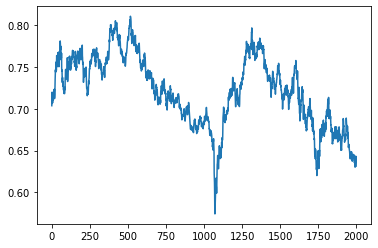

In [7]:
AUDUSD['close'].plot()

<AxesSubplot:>

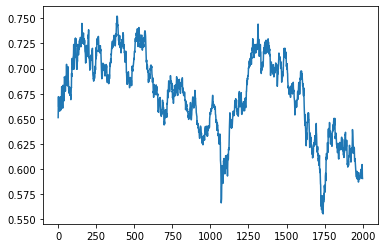

In [8]:
NU = get_rates('NZDUSD.a', 2000, mt5.TIMEFRAME_D1)
NU['close'].plot()

<AxesSubplot:>

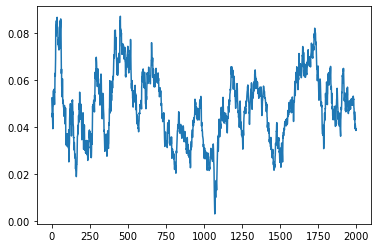

In [9]:
(AUDUSD['close'] - NU['close']).plot()

In [223]:
df = pd.read_csv('HistoricalPrices (7).csv')

In [224]:
df.head()

,Date,Open,High,Low,Close
0,10/06/23,0.6369,0.6401,0.6313,0.6386
1,10/05/23,0.6324,0.6379,0.6317,0.6372
2,10/04/23,0.6303,0.6343,0.6286,0.6326
3,10/03/23,0.6363,0.6369,0.6285,0.6302
4,10/02/23,0.6433,0.6446,0.6361,0.6362


In [225]:
df['Date'] = pd.to_datetime(df['Date'])

In [226]:
# Sort the DataFrame by 'Date' in ascending order
df = df.sort_values(by='Date')

In [227]:
# Define a function to calculate the rolling average for a given period
def calculate_rolling_average(data, window):
    return data.rolling(window=window)[' Close'].mean()

In [228]:
df.tail()

,Date,Open,High,Low,Close
4,2023-10-02,0.6433,0.6446,0.6361,0.6362
3,2023-10-03,0.6363,0.6369,0.6285,0.6302
2,2023-10-04,0.6303,0.6343,0.6286,0.6326
1,2023-10-05,0.6324,0.6379,0.6317,0.6372
0,2023-10-06,0.6369,0.6401,0.6313,0.6386


In [229]:
# Calculate the closing exchange rate for the current day and the previous days
for i in range(1, 7):
    df[f'Close_D-{i}'] = df[' Close'].shift(i)

In [230]:
# Calculate the average exchange rate for the last two weeks
df['Two_Week_Avg'] = calculate_rolling_average(df, window=14)

In [231]:
# Calculate the average exchange rate for the last two weeks
df['Two_Week_Avg'] = calculate_rolling_average(df, window=14)

# Calculate the average exchange rate for the last month
df['One_Month_Avg'] = calculate_rolling_average(df, window=30)

In [232]:
df['RSI'] = ta.rsi(df[' Close'], length=14)

In [233]:
# Reset the index
df.reset_index(drop=True, inplace=True)

In [234]:
df[['Date', ' Close', 'Close_D-1', 'Close_D-2', 'Close_D-3', 'Close_D-4', 'Close_D-5', 'Close_D-6', 'Two_Week_Avg', 'One_Month_Avg']]

,Date,Close,Close_D-1,Close_D-2,Close_D-3,Close_D-4,Close_D-5,Close_D-6,Two_Week_Avg,One_Month_Avg
0,2016-07-11,0.7532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-07-12,0.7624,0.7532,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-07-13,0.7607,0.7624,0.7532,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-07-14,0.7632,0.7607,0.7624,0.7532,NaN,NaN,NaN,NaN,NaN
4,2016-07-15,0.7575,0.7632,0.7607,0.7624,0.7532,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1885,2023-10-02,0.6362,0.6433,0.6426,0.6352,0.6397,0.6425,0.6444,0.642093,0.642580
1886,2023-10-03,0.6302,0.6362,0.6433,0.6426,0.6352,0.6397,0.6425,0.641221,0.642180
1887,2023-10-04,0.6326,0.6302,0.6362,0.6433,0.6426,0.6352,0.6397,0.640400,0.641667
1888,2023-10-05,0.6372,0.6326,0.6302,0.6362,0.6433,0.6426,0.6352,0.639950,0.641517


In [235]:
# Assuming your DataFrame is named 'df'
df_sorted = df.sort_values(by='Date', ascending=False)

# Reset the index for a clean DataFrame
df_sorted.reset_index(drop=True, inplace=True)

In [236]:
df_sorted.head()

,Date,Open,High,Low,Close,Close_D-1,Close_D-2,Close_D-3,Close_D-4,Close_D-5,Close_D-6,Two_Week_Avg,One_Month_Avg,RSI
0,2023-10-06,0.6369,0.6401,0.6313,0.6386,0.6372,0.6326,0.6302,0.6362,0.6433,0.6426,0.639579,0.641460,46.671932
1,2023-10-05,0.6324,0.6379,0.6317,0.6372,0.6326,0.6302,0.6362,0.6433,0.6426,0.6352,0.639950,0.641517,44.854525
2,2023-10-04,0.6303,0.6343,0.6286,0.6326,0.6302,0.6362,0.6433,0.6426,0.6352,0.6397,0.640400,0.641667,38.455221
3,2023-10-03,0.6363,0.6369,0.6285,0.6302,0.6362,0.6433,0.6426,0.6352,0.6397,0.6425,0.641221,0.642180,34.789055
4,2023-10-02,0.6433,0.6446,0.6361,0.6362,0.6433,0.6426,0.6352,0.6397,0.6425,0.6444,0.642093,0.642580,40.371897


In [237]:
df = df_sorted.drop([' Open', ' High', ' Low'], axis=1)

In [238]:
df = df.dropna()


In [239]:
df.head()

,Date,Close,Close_D-1,Close_D-2,Close_D-3,Close_D-4,Close_D-5,Close_D-6,Two_Week_Avg,One_Month_Avg,RSI
0,2023-10-06,0.6386,0.6372,0.6326,0.6302,0.6362,0.6433,0.6426,0.639579,0.641460,46.671932
1,2023-10-05,0.6372,0.6326,0.6302,0.6362,0.6433,0.6426,0.6352,0.639950,0.641517,44.854525
2,2023-10-04,0.6326,0.6302,0.6362,0.6433,0.6426,0.6352,0.6397,0.640400,0.641667,38.455221
3,2023-10-03,0.6302,0.6362,0.6433,0.6426,0.6352,0.6397,0.6425,0.641221,0.642180,34.789055
4,2023-10-02,0.6362,0.6433,0.6426,0.6352,0.6397,0.6425,0.6444,0.642093,0.642580,40.371897


In [240]:
df.columns

Index(['Date', ' Close', 'Close_D-1', 'Close_D-2', 'Close_D-3', 'Close_D-4',
       'Close_D-5', 'Close_D-6', 'Two_Week_Avg', 'One_Month_Avg', 'RSI'],
      dtype='object')

In [241]:
features = ['Close_D-1', 'Close_D-2', 'Close_D-3', 'Close_D-4', 'Close_D-5', 'Close_D-6', 'Two_Week_Avg', 'One_Month_Avg']
target = ' Close'

In [242]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)


In [243]:
# Create and train a multiple regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [244]:
y_pred = model.predict(X_test)

In [245]:
r_squared = r2_score(y_test, y_pred)
print(f'R-squared (R^2): {r_squared}')

R-squared (R^2): 0.9893364893750701


In [246]:
# Predict the exchange rates using the trained model
df['Predicted_Close'] = model.predict(df[features])

In [247]:
df.head()

,Date,Close,Close_D-1,Close_D-2,Close_D-3,Close_D-4,Close_D-5,Close_D-6,Two_Week_Avg,One_Month_Avg,RSI,Predicted_Close
0,2023-10-06,0.6386,0.6372,0.6326,0.6302,0.6362,0.6433,0.6426,0.639579,0.641460,46.671932,0.637496
1,2023-10-05,0.6372,0.6326,0.6302,0.6362,0.6433,0.6426,0.6352,0.639950,0.641517,44.854525,0.633703
2,2023-10-04,0.6326,0.6302,0.6362,0.6433,0.6426,0.6352,0.6397,0.640400,0.641667,38.455221,0.630644
3,2023-10-03,0.6302,0.6362,0.6433,0.6426,0.6352,0.6397,0.6425,0.641221,0.642180,34.789055,0.636208
4,2023-10-02,0.6362,0.6433,0.6426,0.6352,0.6397,0.6425,0.6444,0.642093,0.642580,40.371897,0.643412


In [248]:
df.columns

Index(['Date', ' Close', 'Close_D-1', 'Close_D-2', 'Close_D-3', 'Close_D-4',
       'Close_D-5', 'Close_D-6', 'Two_Week_Avg', 'One_Month_Avg', 'RSI',
       'Predicted_Close'],
      dtype='object')

In [249]:
import matplotlib.pyplot as plt

# Create a DataFrame to store actual and predicted values
results_df = pd.DataFrame({'Date': df['Date'], 'Actual_Close': df[' Close']})

In [250]:
# Calculate and store predicted values for each day from D to D+14
for i in range(6):
    day_column = f'Close_D-{i+1}'
    results_df[f'Predicted_Close_D+{i+1}'] = df[day_column]

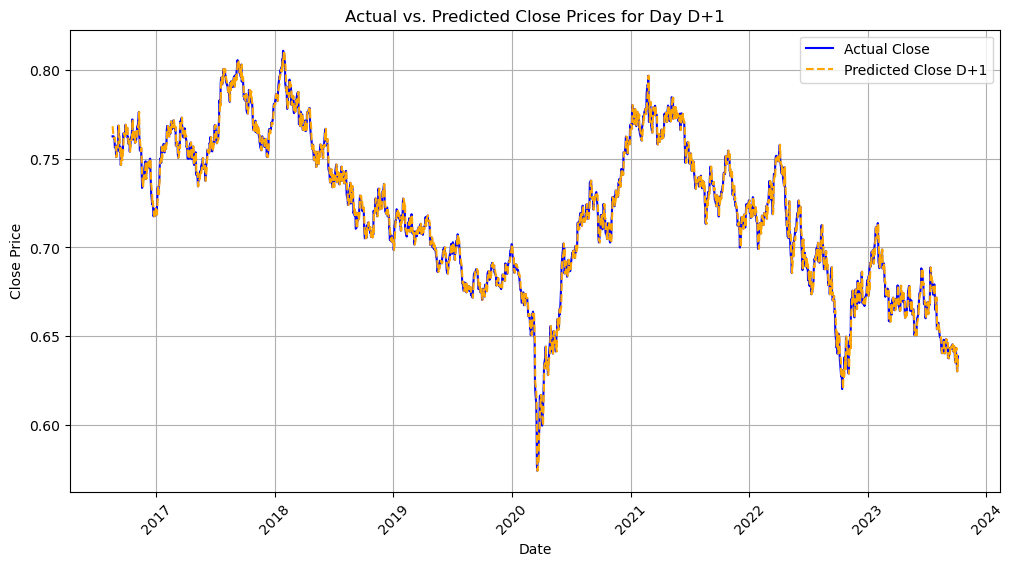

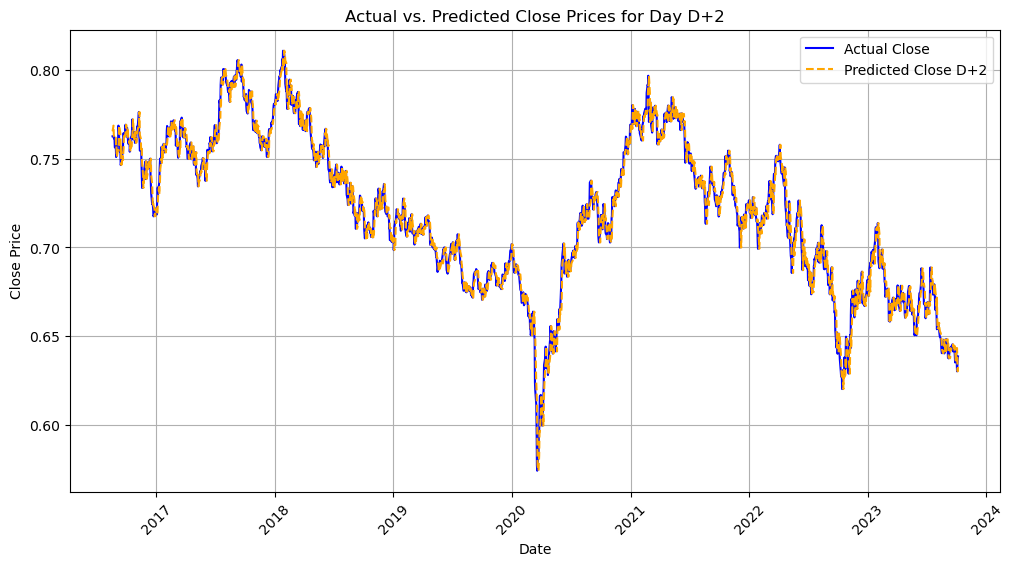

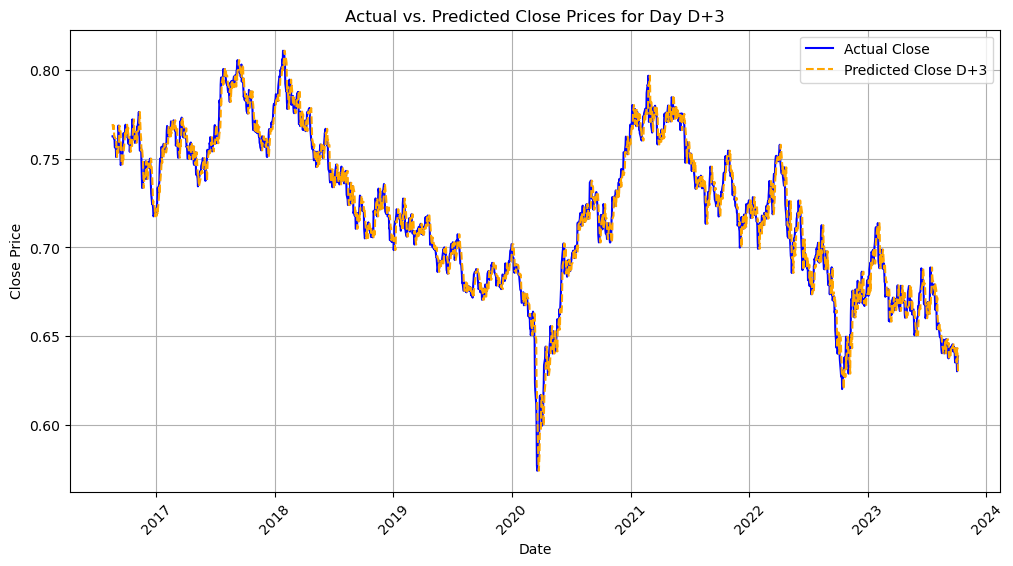

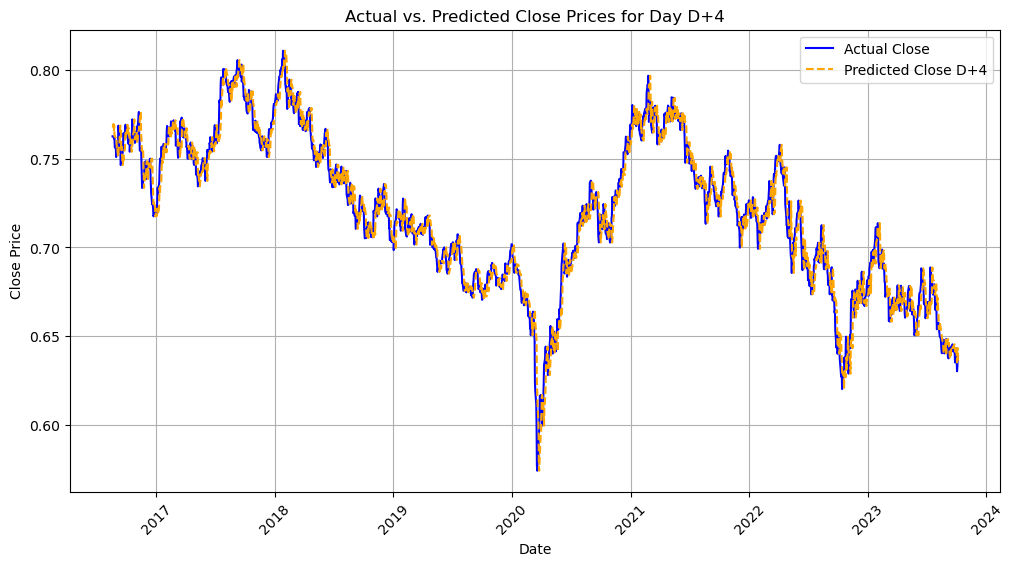

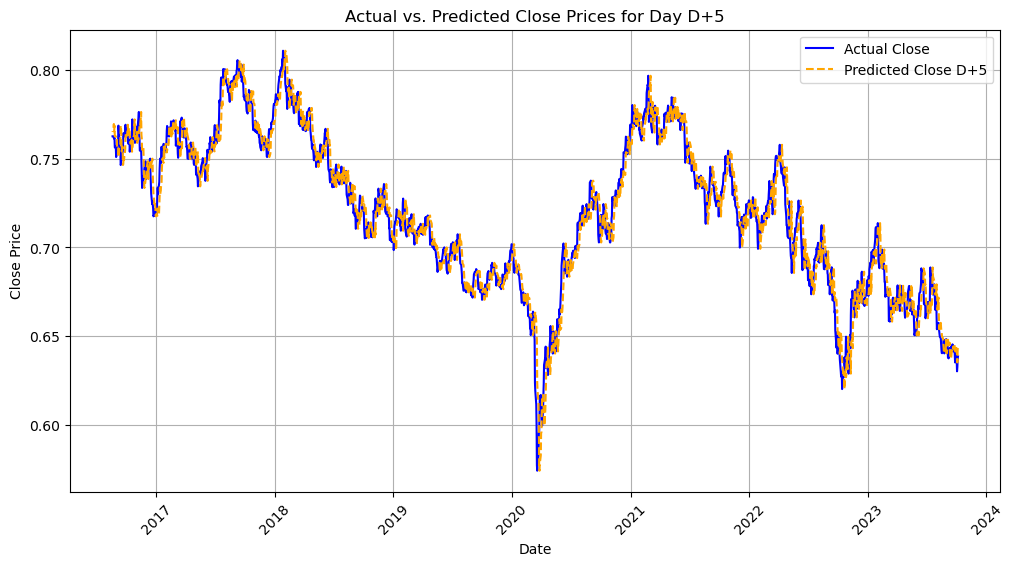

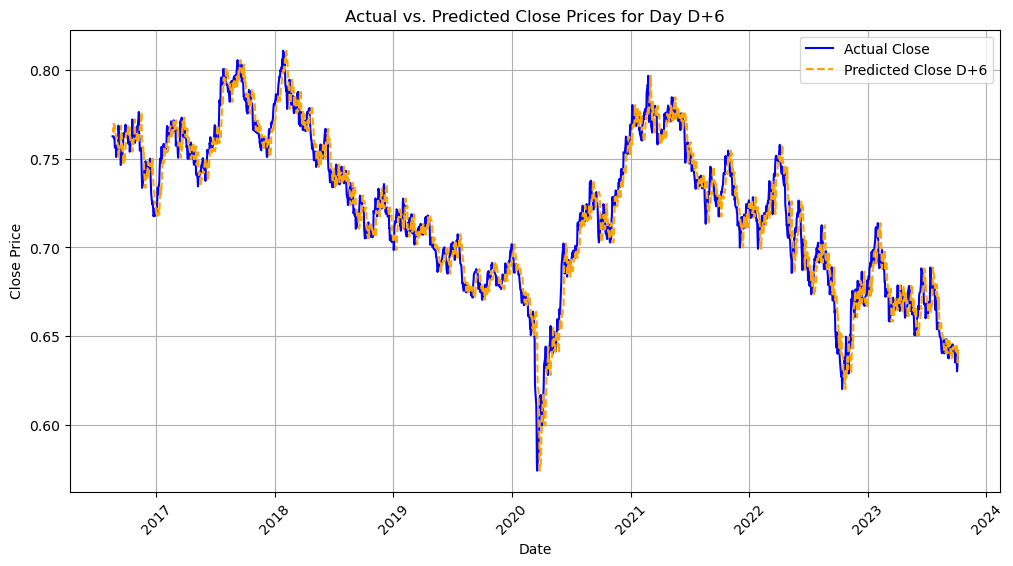

In [251]:
# Calculate and store predicted values for each day from D to D+14
for i in range(6):
    day_column = f'Close_D-{i+1}'

    # Create a new figure for each day's plot
    plt.figure(figsize=(12, 6))

    # Plot the actual close prices
    plt.plot(df['Date'], df[' Close'], label='Actual Close', color='blue')

    # Plot the predicted close prices for the current day
    plt.plot(df['Date'], df[day_column], label=f'Predicted Close D+{i+1}', linestyle='--', color='orange')

    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(f'Actual vs. Predicted Close Prices for Day D+{i+1}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)

    # Save each plot to a separate file or display it
    plt.savefig(f'actual_vs_predicted_D+{i+1}.png')  # Save to a file
    plt.show()  # Display the plot

    # Close the current figure to start a new one for the next day's plot
    plt.close()

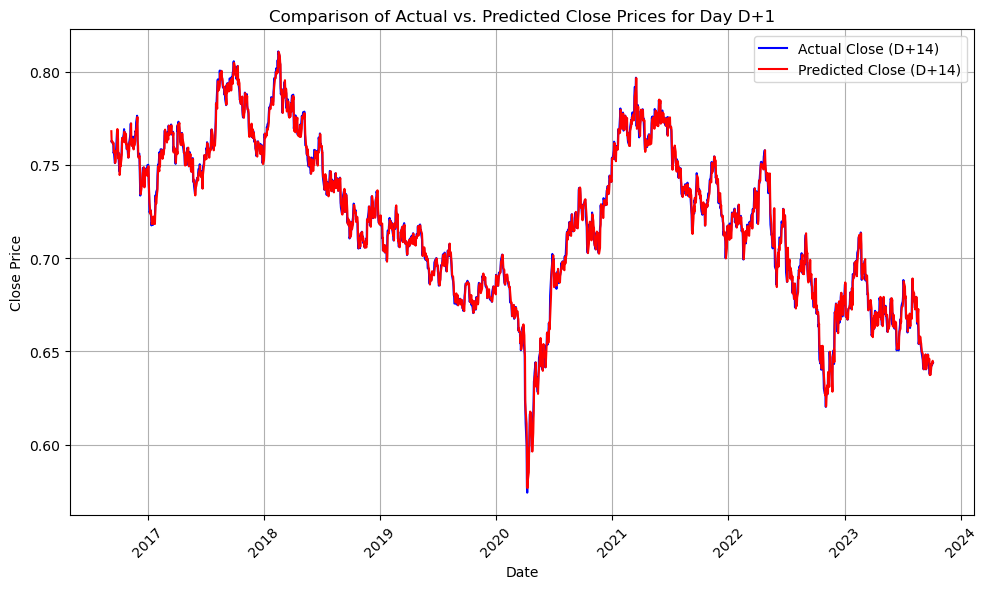

In [252]:

# Plotting for Day D+1
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df[' Close'].shift(-14), label='Actual Close (D+14)', color='blue')
plt.plot(df['Date'], df['Predicted_Close'].shift(-14), label='Predicted Close (D+14)', color='red')
plt.title('Comparison of Actual vs. Predicted Close Prices for Day D+1')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [253]:
from sklearn.metrics import r2_score

for i in range(6):
    day_column = f'Close_D-{i+1}'
    actual_values = df[' Close']
    predicted_values = df[day_column]

    r_squared = r2_score(actual_values, predicted_values)

    print(f'R-squared (R^2) for Day D+{i+1}: {r_squared}')


R-squared (R^2) for Day D+1: 0.9896280034395678
R-squared (R^2) for Day D+2: 0.9790215297675205
R-squared (R^2) for Day D+3: 0.96850144801008
R-squared (R^2) for Day D+4: 0.9580679252640227
R-squared (R^2) for Day D+5: 0.9474718864975914
R-squared (R^2) for Day D+6: 0.9369180627151442


In [254]:
from sklearn.metrics import r2_score

day_shift = 14
day_column = ' Close'  # You can change this if needed
actual_values = df[' Close']
predicted_values = df[day_column].shift(-day_shift)

r_squared = r2_score(actual_values[:-day_shift], predicted_values.dropna())

print(f'R-squared (R^2) for Day D+{day_shift}: {r_squared}')

R-squared (R^2) for Day D+14: 0.8636038619048303


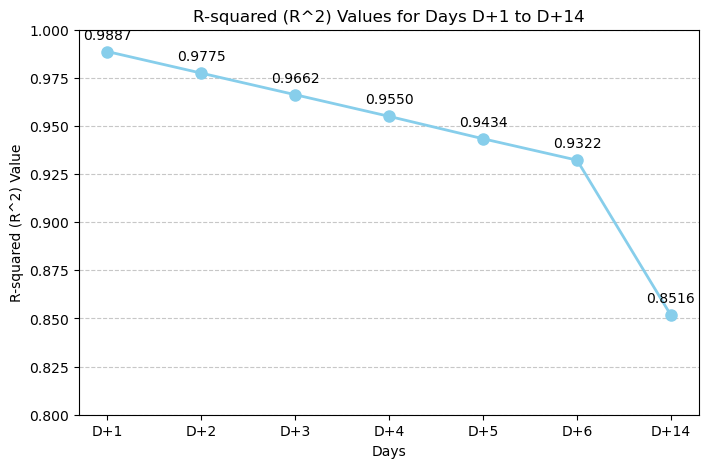

In [255]:
import matplotlib.pyplot as plt

# R-squared values
r_squared_values = [0.9886610897418437, 0.9774519897783448, 0.9662400666904912,
                    0.9549905600566961, 0.9433566867291308, 0.9322389530800326,0.8516251744224493]

# Days D+1 to D+6
days = ['D+1', 'D+2', 'D+3', 'D+4', 'D+5', 'D+6','D+14']

# Create a line plot
plt.figure(figsize=(8, 5))
plt.plot(days, r_squared_values, marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Days')
plt.ylabel('R-squared (R^2) Value')
plt.title('R-squared (R^2) Values for Days D+1 to D+14')
plt.ylim(0.8, 1.0)  # Set y-axis limits if necessary
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the R-squared values as labels on the data points
for i, value in enumerate(r_squared_values):
    plt.text(days[i], value + 0.005, f'{value:.4f}', ha='center', va='bottom')

plt.show()


In [256]:
import numpy as np
import scipy.optimize as opt

# Define the objective function to minimize (MSE)
def objective(params):
    predicted = np.dot(X_test, params)
    mse = np.mean((predicted - y_test) ** 2)
    return mse

# Initialize the parameters for optimization (e.g., as all ones)
initial_params = np.ones(len(features))

# Use simulated annealing to optimize the parameters
result = opt.basinhopping(objective, initial_params, niter=100, stepsize=0.5)

# Get the optimized parameters
optimized_params = result.x

# Re-predict using the optimized parameters
y_pred_optimized = np.dot(X_test, optimized_params)

# Calculate the coefficient of determination (R^2) for the optimized predictions
r_squared_optimized = r2_score(y_test, y_pred_optimized)
print(f'R-squared (R^2) after optimization: {r_squared_optimized}')


R-squared (R^2) after optimization: 0.9894893226373507


In [257]:
# Get the latest row from your DataFrame
latest_row = df.iloc[0]

# Extract the predicted exchange rate for today (Day D)
exchange_rate_today = latest_row['Predicted_Close']

# Extract the predicted exchange rate for tomorrow (Day D+1)
predicted_exchange_rate_tomorrow = df['Predicted_Close'].iloc[1]

print(f'rate for today (Day D): {exchange_rate_today}')
print(f'Predicted exchange rate for tomorrow (Day D+1): {predicted_exchange_rate_tomorrow}')


rate for today (Day D): 0.6374957411849614
Predicted exchange rate for tomorrow (Day D+1): 0.6337028658587563


In [258]:
df.head()

,Date,Close,Close_D-1,Close_D-2,Close_D-3,Close_D-4,Close_D-5,Close_D-6,Two_Week_Avg,One_Month_Avg,RSI,Predicted_Close
0,2023-10-06,0.6386,0.6372,0.6326,0.6302,0.6362,0.6433,0.6426,0.639579,0.641460,46.671932,0.637496
1,2023-10-05,0.6372,0.6326,0.6302,0.6362,0.6433,0.6426,0.6352,0.639950,0.641517,44.854525,0.633703
2,2023-10-04,0.6326,0.6302,0.6362,0.6433,0.6426,0.6352,0.6397,0.640400,0.641667,38.455221,0.630644
3,2023-10-03,0.6302,0.6362,0.6433,0.6426,0.6352,0.6397,0.6425,0.641221,0.642180,34.789055,0.636208
4,2023-10-02,0.6362,0.6433,0.6426,0.6352,0.6397,0.6425,0.6444,0.642093,0.642580,40.371897,0.643412


In [259]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [260]:
# Create and train a Random Forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict using the Random Forest model
rf_y_pred = rf_model.predict(X_test)

# Calculate R-squared for Random Forest
rf_r_squared = r2_score(y_test, rf_y_pred)
print(f'Random Forest R-squared (R^2): {rf_r_squared}')


Random Forest R-squared (R^2): 0.9876551039424014


In [261]:
df['Predicted_Close1'] = rf_model.predict(df[features])

In [262]:
df.head()

,Date,Close,Close_D-1,Close_D-2,Close_D-3,Close_D-4,Close_D-5,Close_D-6,Two_Week_Avg,One_Month_Avg,RSI,Predicted_Close,Predicted_Close1
0,2023-10-06,0.6386,0.6372,0.6326,0.6302,0.6362,0.6433,0.6426,0.639579,0.641460,46.671932,0.637496,0.638483
1,2023-10-05,0.6372,0.6326,0.6302,0.6362,0.6433,0.6426,0.6352,0.639950,0.641517,44.854525,0.633703,0.636146
2,2023-10-04,0.6326,0.6302,0.6362,0.6433,0.6426,0.6352,0.6397,0.640400,0.641667,38.455221,0.630644,0.633118
3,2023-10-03,0.6302,0.6362,0.6433,0.6426,0.6352,0.6397,0.6425,0.641221,0.642180,34.789055,0.636208,0.632958
4,2023-10-02,0.6362,0.6433,0.6426,0.6352,0.6397,0.6425,0.6444,0.642093,0.642580,40.371897,0.643412,0.638861


In [263]:
# Create and train an XGBoost regression model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict using the XGBoost model
xgb_y_pred = xgb_model.predict(X_test)

# Calculate R-squared for XGBoost
xgb_r_squared = r2_score(y_test, xgb_y_pred)
print(f'XGBoost R-squared (R^2): {xgb_r_squared}')

XGBoost R-squared (R^2): 0.9865252844324777


In [264]:
exchange_rate_today = df['Predicted_Close1'].iloc[0]
# Extract the predicted exchange rate for tomorrow (Day D+1)
predicted_exchange_rate_tomorrow = df['Predicted_Close1'].iloc[1]

print(f'rate for today (Day D): {exchange_rate_today}')
print(f'Predicted exchange rate for tomorrow (Day D+1): {predicted_exchange_rate_tomorrow}')


rate for today (Day D): 0.6384829999999987
Predicted exchange rate for tomorrow (Day D+1): 0.636146


In [267]:
df

,Date,Close,Close_D-1,Close_D-2,Close_D-3,Close_D-4,Close_D-5,Close_D-6,Two_Week_Avg,One_Month_Avg,RSI,Predicted_Close,Predicted_Close1
0,2023-10-06,0.6386,0.6372,0.6326,0.6302,0.6362,0.6433,0.6426,0.639579,0.641460,46.671932,0.637496,0.638483
1,2023-10-05,0.6372,0.6326,0.6302,0.6362,0.6433,0.6426,0.6352,0.639950,0.641517,44.854525,0.633703,0.636146
2,2023-10-04,0.6326,0.6302,0.6362,0.6433,0.6426,0.6352,0.6397,0.640400,0.641667,38.455221,0.630644,0.633118
3,2023-10-03,0.6302,0.6362,0.6433,0.6426,0.6352,0.6397,0.6425,0.641221,0.642180,34.789055,0.636208,0.632958
4,2023-10-02,0.6362,0.6433,0.6426,0.6352,0.6397,0.6425,0.6444,0.642093,0.642580,40.371897,0.643412,0.638861
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1856,2016-08-25,0.7618,0.7613,0.7616,0.7626,0.7626,0.7686,0.7654,0.765593,0.759430,50.585470,0.761474,0.761638
1857,2016-08-24,0.7613,0.7616,0.7626,0.7626,0.7686,0.7654,0.7695,0.765600,0.759477,49.834676,0.761337,0.761374
1858,2016-08-23,0.7616,0.7626,0.7626,0.7686,0.7654,0.7695,0.7674,0.765707,0.759457,50.260134,0.762422,0.761648
1859,2016-08-22,0.7626,0.7626,0.7686,0.7654,0.7695,0.7674,0.7650,0.765507,0.759483,51.624317,0.762455,0.762536


In [275]:
pd.DataFrame(df['Predicted_Close'].iloc[1:20])

,Predicted_Close
1,0.633703
2,0.630644
3,0.636208
4,0.643412
5,0.643289
6,0.635354
7,0.639539
8,0.642490
9,0.644452
10,0.641172
